# Coulomb Stopping Powers in a WD 

In [5]:
# %matplotlib nbagg
%matplotlib inline

import time 

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,20]

import stoppingpower as sp

In [6]:
Z_carbon = 6.0
A_carbon = 12.0
n_elec = Z_carbon*(10.0**np.array([30.0, 31.0, 32.0])) # cm^{-3}
m_proton = 940.0 # MeV
m_electron = 0.5 # Mev
m_pion = 140.0 # MeV

incidents = ["pion", "electron", "carbon"]
masses = {"pion":m_pion, 
          "electron":m_electron, 
          "carbon":m_proton*A_carbon}
charges = {"pion":1.0, 
           "electron":-1.0, 
           "carbon":Z_carbon}

density: 6e+30 cm^(-3)
p_fermi: 1.12 MeV
    calculating pion stopping power...


AttributeError: 'FermiSea_StoppingPower' object has no attribute 'get_weighted_integrand'

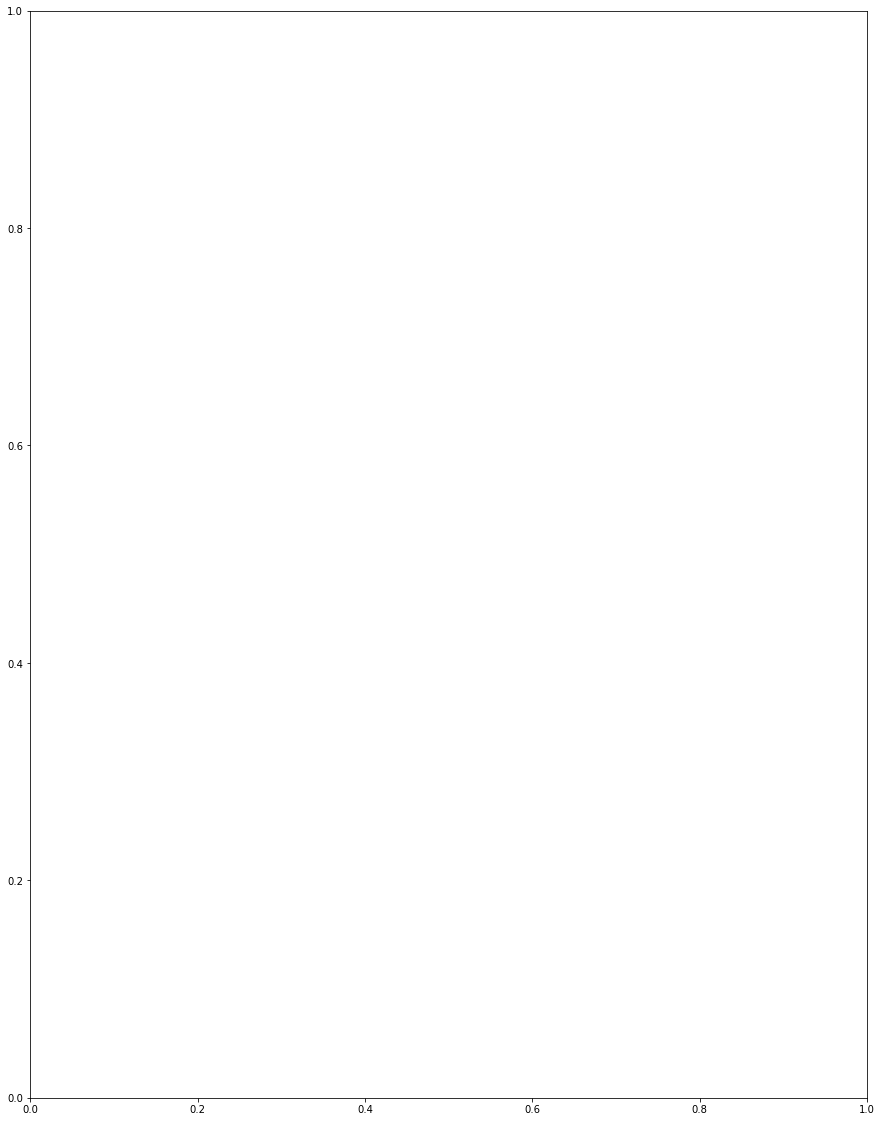

In [7]:
ke = np.logspace(-2, 12, 50)
samples = 10**2

dedx, dedx_err = {}, {}
fig, ax = plt.subplots()
for n_index, n0 in enumerate(n_elec):
    wd = sp.FermiSea_StoppingPower(m=m_electron, n0=n0, 
                                   masstolength=sp.MeV_to_InvCM)
    print "density: {} cm^(-3)".format(n0)
    print "p_fermi: {:.2f} MeV".format(wd.pfermi)
    
    for incident in incidents:
        dedx_func = wd.get_coulomb_stopping_power(masses[incident], 
                                                  charges[incident])
        dedx_approx_func = wd.approx_sp_piecewise(masses[incident], 
                                                  charges[incident])
        print "    calculating {} stopping power...".format(incident)
        t0 = time.time()
        sp[incident], sp_err[incident] = dedx_func(ke, samples=samples)
        elapsed = (time.time() - t0)/60.0
        print "    .... finished in {:.3f} minutes".format(elapsed)
        dedx_plot = ax.errorbar(ke, sp[incident], yerr=sp_err[incident], 
                                alpha=0.6, marker='.', linestyle='', 
                                label=("{} at {} cm^-3"
                                       "".format(incident, n0)))
        current_color = dedx_plot[0].get_color()
        ax.plot(ke, dedx_approx_func(ke),
                alpha=0.4, marker='', color=current_color,
                linestyle='-', label="approx at {} cm^-3".format(n0))
    if n_index == (len(incidents)-1):
        ax.set_title("WD Coulomb Stopping Powers", fontsize=12)
        ax.set_xlabel("Incident Kinetic Energy [MeV]", fontsize=12)
        ax.set_ylabel("Normalized Stopping Power [MeV cm^2]", fontsize=12)
        ax.set_xscale("log")
        ax.set_yscale("log")
ax.legend(loc="best")